Accuracy (Initial SVM): 0.967948717948718
                 precision    recall  f1-score   support

Fraude Critique       0.00      0.00      0.00        24
 Fraude Mineure       0.57      0.75      0.65       183
 Fraude Modérée       0.99      0.98      0.99      4473

       accuracy                           0.97      4680
      macro avg       0.52      0.58      0.55      4680
   weighted avg       0.97      0.97      0.97      4680

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ...................

C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

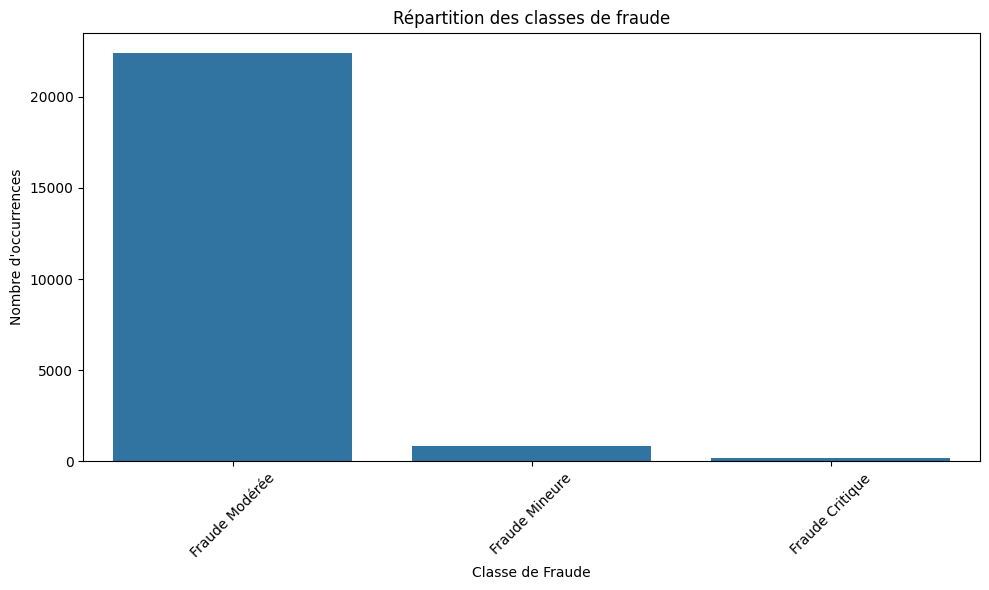

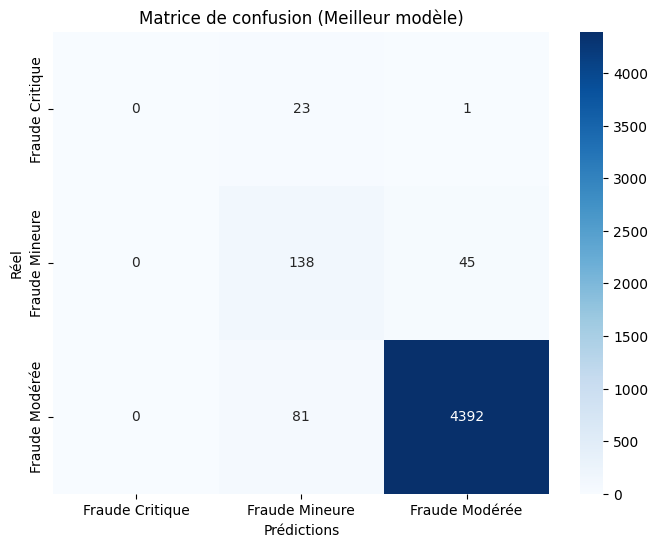

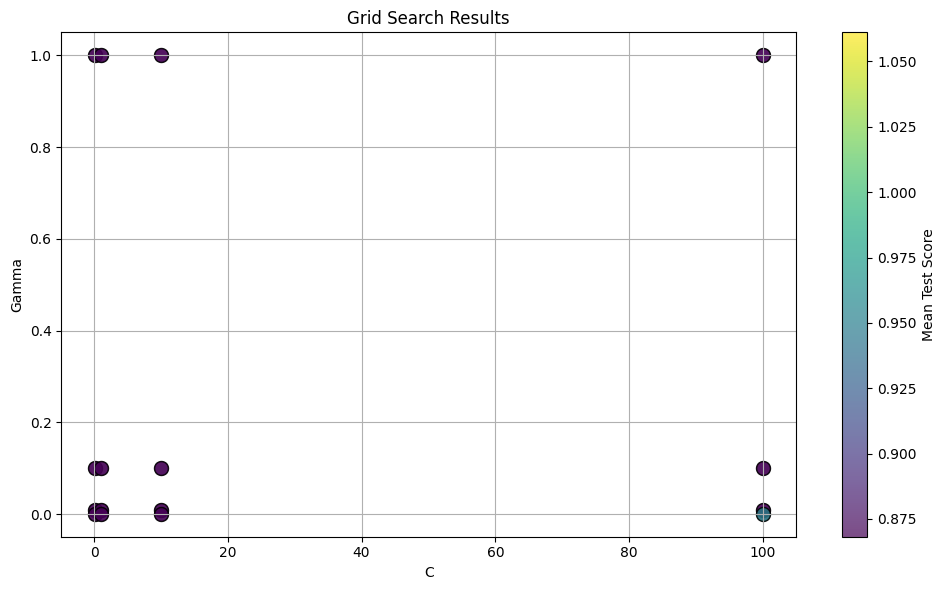

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Répertoire contenant les fichiers CSV
directory = 'C:\\Users\\chiraz\\Desktop\\mypfe\\detectioncode\\csvfiles'
dfs = []

# Parcourir tous les fichiers dans le répertoire
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename) 
        # Lire le fichier CSV dans un DataFrame
        df = pd.read_csv(filepath)
        # Ajouter le DataFrame à la liste
        dfs.append(df)

# Concaténer tous les DataFrames dans un seul DataFrame
final_table = pd.concat(dfs, ignore_index=True)
final_table.to_csv('fraudes.csv', index=False)

# Fonction pour catégoriser les types de fraude en classes
def categorize_fraude(fraude):
    if fraude in ['Faux mca', 'faux numero contrats']:
        return 'Fraude Critique'
    elif fraude in ['Contrat doublant', 'fake tags', 'Faux code postal']:
        return 'Fraude Modérée'
    elif fraude in ['fake ville', 'Contrat sans echeancier', 'fausse periode pour aesio', 'fausse periode pour acheel']:
        return 'Fraude Mineure'
    else:
        return 'unknown'

# Ajout de la colonne 'classe_fraude'
final_table['classe_fraude'] = final_table['Type_fraude'].apply(categorize_fraude)

# Encodage des étiquettes
label_encoder = LabelEncoder()
final_table['classe_fraude_encoded'] = label_encoder.fit_transform(final_table['classe_fraude'])

# Préparation des caractéristiques (ajout de la date comme caractéristique)
final_table['Date_systeme'] = pd.to_datetime(final_table['Date_systeme'])
final_table['year'] = final_table['Date_systeme'].dt.year
final_table['month'] = final_table['Date_systeme'].dt.month
final_table['day'] = final_table['Date_systeme'].dt.day

X = final_table[['year', 'month', 'day']]  
y = final_table['classe_fraude_encoded']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraînement du modèle SVM initial
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prédictions et évaluation initiale
y_pred = svm_model.predict(X_test)
print("Accuracy (Initial SVM):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Ajustement des hyperparamètres avec GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("\nBest Parameters (SVM GridSearchCV):", grid.best_params_)

# Prédictions avec le meilleur modèle trouvé par GridSearchCV
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

# Nouvelle évaluation avec le meilleur modèle
print("\nAccuracy (Best SVM Model):", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

# Graphiques supplémentaires

# Répartition des classes de fraude
plt.figure(figsize=(10, 6))
sns.countplot(data=final_table, x='classe_fraude', order=final_table['classe_fraude'].value_counts().index)
plt.title('Répartition des classes de fraude')
plt.xlabel('Classe de Fraude')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Matrice de confusion pour le meilleur modèle
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.title('Matrice de confusion (Meilleur modèle)')
plt.show()

# Visualisation des hyperparamètres
results = grid.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
for param, score in zip(params, mean_test_scores):
    plt.scatter([param['C']], [param['gamma']], c=score, cmap='viridis', s=100, edgecolor='k', alpha=0.7)

plt.colorbar(label='Mean Test Score')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Grid Search Results')
plt.grid(True)
plt.tight_layout()
plt.show()
